# 04 - Pandas

This notebook will cover an overview of pandas


# Pandas

- pandas is a python package that allows for easy manipulation of tabular/matrix data
- pandas is very fast.  Data is loaded into memory and not disk, so it also may take up a lot of RAM.

## Loading Data

- Can load data to a dataframe a variety of ways:
    - Use many of the read_ functions like `read_csv`, `read_json`, `read_sql`, `read_pickle`, `read_parquet`
    - Create one from a list of dictionaries
    - Can create one from a list of tuples and input the column names as a separate list.  Be careful here as the order of the names of the columns must match the order of each item in each of the tuples.
    - There are many more…
- Loading data will create a default index, if one is not specified from 0 to the number of rows-1.  - - - - Removing rows will create “holes” in your index
- Will try to autodetect the data types.  Use `.dtypes` or `.info()` to see information about the data types in your dataframe
- `.head()` will print out first 5 rows
- `.shape` will produce a tuple of the number of rows and the number of columns


In [190]:
import pandas as pd #pd is common alias
from pathlib import Path
import json

df = pd.read_csv('anxiety.csv')

df.head(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [191]:
#[{k:v for k,v in dict_.items() if pd.isnull(v)} for dict_ in df.to_dict(orient='records')]
#Path('anxiety.json').write_text(json.dumps(df.to_dict(orient='records')))

- Also good to know that pd.read_csv is a static method whereas .head() is dynamic/instance method
- Static methods are not used with an instance of a class
- Dynamic methods are called on an instance of a class

In [192]:
df = pd.read_json('anxiety.json') #this is called static method.

df.head(5) #this is dynamic method,

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [193]:
#!pip install pyarrow
# Pronounced PAR-KAY
df_flights = pd.read_parquet('flight_paths_1min.parquet') #checkout what is parquet
df_flights.head()

,dt,lat,lon,alt_baro,track,squawk,aid
0,2022-10-05 09:07:00,41.231771,-73.423621,17078.846154,80.638462,7162.0,a5d56b
1,2022-10-05 09:07:00,41.630808,-73.806808,33000.000000,14.000000,2707.0,a85054
2,2022-10-05 09:07:00,41.069284,-73.085383,16687.500000,18.200000,2425.0,ac5378
3,2022-10-05 09:07:00,41.579141,-72.742712,32003.846154,54.815385,1657.0,a8f3c5
4,2022-10-05 09:07:00,41.431284,-72.685487,19000.000000,78.453846,1655.0,a1e58f


Create one from a list of dictionaries

In [194]:
meta_dict = json.loads(Path('anxiety.json').read_text(encoding='utf-8'))
meta_dict[0]

{'ID': 1,
 'Age': 56,
 'Gender': 'Female',
 'Occupation': 'Other',
 'Sleep Hours': 9.6,
 'Physical Activity (hrs/week)': 8.3,
 'Caffeine Intake (mg/day)': 175,
 'Alcohol Consumption (drinks/week)': 6,
 'Smoking': 'No',
 'Family History of Anxiety': 'No',
 'Stress Level (1-10)': 4,
 'Heart Rate (bpm during attack)': 145,
 'Breathing Rate (breaths/min)': 33,
 'Sweating Level (1-5)': 3,
 'Dizziness': 'No',
 'Medication': 'No',
 'Therapy Sessions (per month)': 4,
 'Recent Major Life Event': 'Yes',
 'Diet Quality (1-10)': 9,
 'Severity of Anxiety Attack (1-10)': 10}

In [195]:
df = pd.DataFrame(meta_dict)

df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


Can create one from a list of tuples and input the column names as a separate list.  Be careful here as the order of the names of the columns must match the order of each item in each of the tuples.

In [196]:
df = pd.DataFrame([(1,'a', 2.2),(1,'b', 3.2),(1,'c', 4.2)], columns=['col1', 'col2', 'col3'])

df

,col1,col2,col3
0,1,a,2.2
1,1,b,3.2
2,1,c,4.2


Loading data will create a default index, if one is not specified from 0 to the number of rows-1.  Removing rows will create “holes” in your index

In [197]:
df = pd.read_csv('anxiety.csv')
df[df['Gender']=='Male'].head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
5,6,38,Male,Student,6.7,9.9,194,16,No,Yes,2,174,25,3,No,Yes,2,Yes,1,8
6,7,56,Male,Doctor,3.8,7.5,411,13,Yes,Yes,2,81,22,4,No,No,5,Yes,10,10


Will try to autodetect the data types.  Use `.dtypes` or `.info()` to see information about the data types in your dataframe

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [199]:
df.dtypes

ID                                     int64
Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Severity of Anxiety Attack (1-10)      int64
dtype: object

Can set column type with astype

In [200]:
df['Caffeine Intake (mg/day)'] = df['Caffeine Intake (mg/day)'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  object 
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [201]:
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


`.head()` will print out first 5 rows

In [202]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


`.shape` will produce a tuple of the number of rows and the number of columns

In [203]:
df.shape

(12000, 20)

Let's clean up the column names

In [204]:
import re

df2 = df.copy()
df2.columns = [re.sub(r'[^\w]+','_',c.lower()).strip('_') for c in df.columns]
df2.head()

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


## Iterative vs. Vectorized

Lots of vectorized functions

- Most built in operations on dataframes are vectorized.
- Some which are not. `.apply()` for example
- If you write an external loop the operation will usually be slower, sometimes much slower.
- Can use `.iterrows()` to loop through rows, but better (and cleaner) to try and find a built in function or write a function and use apply


In [205]:
%timeit df2['sleep_hours'].max()

17.3 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [206]:
%timeit max(df2['sleep_hours'])

496 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


`.apply` with lambda is very useful

In [207]:
df2['occupation'].apply(lambda x: x.lower())

0           other
1         teacher
2          doctor
3          doctor
4         student
           ...   
11995    engineer
11996      doctor
11997     student
11998     teacher
11999     teacher
Name: occupation, Length: 12000, dtype: object

In [208]:
def clean_text(txt):

    return txt.replace('er', '').strip()

df2['occupation'].apply(clean_text)

0            Oth
1          Teach
2         Doctor
3         Doctor
4        Student
          ...   
11995     Engine
11996     Doctor
11997    Student
11998      Teach
11999      Teach
Name: occupation, Length: 12000, dtype: object

Can use `.iterrows()` to loop through rows, but better (and cleaner) to try and find a built in function or write a function and use apply

In [209]:
for index, row in df2.iterrows():
    print(row['gender'])

Female
Male
Female
Male
Male
Male
Male
Male
Male
Female
Male
Female
Male
Female
Female
Male
Male
Female
Female
Male
Male
Female
Male
Female
Male
Male
Female
Female
Male
Male
Female
Female
Male
Female
Female
Female
Female
Male
Female
Female
Male
Male
Male
Female
Male
Female
Female
Female
Female
Other
Male
Female
Male
Female
Male
Other
Female
Female
Male
Male
Female
Male
Female
Male
Female
Male
Female
Female
Male
Male
Male
Female
Female
Female
Female
Male
Male
Male
Male
Other
Female
Male
Female
Female
Male
Male
Male
Female
Other
Female
Male
Male
Female
Female
Female
Female
Male
Female
Female
Male
Female
Male
Male
Male
Male
Male
Male
Female
Male
Male
Male
Female
Male
Male
Female
Female
Female
Female
Male
Female
Male
Male
Male
Female
Male
Female
Female
Male
Female
Female
Female
Male
Female
Male
Female
Female
Male
Female
Female
Female
Male
Male
Other
Female
Female
Male
Male
Female
Female
Male
Female
Female
Male
Male
Male
Female
Male
Male
Female
Male
Male
Male
Female
Female
Male
Female
Femal

## Selecting/Filtering

- Important to know the difference between `.iloc` and `.loc`
    - `.iloc` uses position based selection.  You can select rows from 0 to the number of rows-1
    - `.loc` uses label based selection.  You need to understand how the rows are labeled or indexed


In [210]:
# .iloc uses position based selection.  You can select rows from 0 to the number of rows-1
df2.iloc[0:10,:]['sleep_hours']

0    9.6
1    6.4
2    6.9
3    9.2
4    9.2
5    6.7
6    3.8
7    4.9
8    6.2
9    8.3
Name: sleep_hours, dtype: float64

In [211]:
df2 = df2.set_index('id', drop=False)
df2.head(5)

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10
id,,,,,,,,,,,,,,,,,,,,
1,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
2,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
3,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
4,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
5,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [212]:
# .loc uses label based selection.  You need to understand how the rows are labeled or indexed.
# If you delete labels, you will get an error if you try to access labels that have been deleted.
filtered = df2[df2['occupation']=='Teacher']
filtered.head(5)

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10
id,,,,,,,,,,,,,,,,,,,,
2,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
8,8,36,Male,Teacher,4.9,0.5,413,4,No,No,3,88,36,5,No,Yes,6,No,4,2
13,13,53,Male,Teacher,9.2,6.8,383,18,Yes,No,3,144,29,4,Yes,No,7,No,7,6
17,17,39,Male,Teacher,4.4,9.5,2,7,No,Yes,1,145,24,3,No,No,3,Yes,3,9
22,22,55,Female,Teacher,4.9,4.3,222,0,No,No,2,66,39,3,No,No,7,No,2,7


In [213]:
# Here we catch multiple errors
# Notice now that the id 3 has been filtered out, using .loc throws an error
import traceback

try:
    filtered.loc[3, :]
except Exception as e:
    print(traceback.format_exc())

Traceback (most recent call last):
  File "c:\Users\mgilbert\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 2606, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 2630, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 3

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\mgilbert\AppData\Local\Temp\ipykernel_17456\1786085926.py", line 6, in <module>
    filtered.loc[3, :]
    ~~~~~~~~~~~~^^^^^^
  File "c:\Users\mgilbert\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexing.py", 

In [214]:
filtered.iloc[3,:]

id                                      17
age                                     39
gender                                Male
occupation                         Teacher
sleep_hours                            4.4
physical_activity_hrs_week             9.5
caffeine_intake_mg_day                   2
alcohol_consumption_drinks_week          7
smoking                                 No
family_history_of_anxiety              Yes
stress_level_1_10                        1
heart_rate_bpm_during_attack           145
breathing_rate_breaths_min              24
sweating_level_1_5                       3
dizziness                               No
medication                              No
therapy_sessions_per_month               3
recent_major_life_event                Yes
diet_quality_1_10                        3
severity_of_anxiety_attack_1_10          9
Name: 17, dtype: object

In [215]:
# Can create masks just like in NumPy
df2['occupation']=='Teacher'

id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999     True
12000     True
Name: occupation, Length: 12000, dtype: bool

In [216]:
# Must use & for and and | for or 
# Include separate boolean masks in parentheses
filtered = df2[(df2['occupation']=='Teacher') & (df2['sleep_hours']<6)]
filtered

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10
id,,,,,,,,,,,,,,,,,,,,
8,8,36,Male,Teacher,4.9,0.5,413,4,No,No,3,88,36,5,No,Yes,6,No,4,2
17,17,39,Male,Teacher,4.4,9.5,2,7,No,Yes,1,145,24,3,No,No,3,Yes,3,9
22,22,55,Female,Teacher,4.9,4.3,222,0,No,No,2,66,39,3,No,No,7,No,2,7
32,32,45,Female,Teacher,4.3,9.2,110,15,No,No,5,109,24,2,No,No,4,No,9,9
39,39,24,Female,Teacher,5.4,7.0,168,2,No,No,3,69,27,4,Yes,No,1,No,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,11955,52,Male,Teacher,5.9,2.9,165,16,Yes,Yes,10,133,38,1,No,No,6,No,3,3
11962,11962,57,Female,Teacher,5.1,1.8,31,3,No,No,3,162,21,4,No,No,1,No,5,5
11963,11963,36,Male,Teacher,4.4,6.2,310,2,No,Yes,10,104,15,1,No,No,7,No,2,4


In [217]:
filtered = df2.query("(occupation == 'Teacher') & (sleep_hours < 6)")
filtered

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10
id,,,,,,,,,,,,,,,,,,,,
8,8,36,Male,Teacher,4.9,0.5,413,4,No,No,3,88,36,5,No,Yes,6,No,4,2
17,17,39,Male,Teacher,4.4,9.5,2,7,No,Yes,1,145,24,3,No,No,3,Yes,3,9
22,22,55,Female,Teacher,4.9,4.3,222,0,No,No,2,66,39,3,No,No,7,No,2,7
32,32,45,Female,Teacher,4.3,9.2,110,15,No,No,5,109,24,2,No,No,4,No,9,9
39,39,24,Female,Teacher,5.4,7.0,168,2,No,No,3,69,27,4,Yes,No,1,No,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,11955,52,Male,Teacher,5.9,2.9,165,16,Yes,Yes,10,133,38,1,No,No,6,No,3,3
11962,11962,57,Female,Teacher,5.1,1.8,31,3,No,No,3,162,21,4,No,No,1,No,5,5
11963,11963,36,Male,Teacher,4.4,6.2,310,2,No,Yes,10,104,15,1,No,No,7,No,2,4


Can also randomly sample rows

In [218]:
df2.sample(100)

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10
id,,,,,,,,,,,,,,,,,,,,
13,13,53,Male,Teacher,9.2,6.8,383,18,Yes,No,3,144,29,4,Yes,No,7,No,7,6
7741,7741,44,Female,Engineer,8.0,8.7,187,0,No,No,5,145,33,2,No,No,5,No,9,9
1488,1488,52,Female,Student,5.2,9.1,240,11,Yes,No,5,100,27,5,No,No,0,Yes,5,8
10022,10022,48,Female,Teacher,7.5,3.0,83,1,No,Yes,6,154,23,4,No,No,0,No,4,7
8828,8828,60,Male,Doctor,9.1,7.0,242,3,No,No,5,171,33,2,Yes,No,9,No,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,9743,38,Male,Engineer,4.8,2.7,11,15,No,Yes,9,98,21,3,No,No,1,No,9,5
3309,3309,57,Male,Student,3.4,6.9,272,6,No,Yes,9,118,29,4,No,Yes,4,No,8,6
9904,9904,45,Female,Other,3.3,4.5,133,12,Yes,No,7,81,38,4,No,No,1,No,5,1


Can select null values with pd.isna

In [219]:
pd.isna(df2['age'])

id
1        False
2        False
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: age, Length: 12000, dtype: bool

## Selecting columns

- Select columns using brackets like `df['column_name']` or `df.column_name`.
- However, if your column name has spaces in it, this will not work.  You need to use the brackets and quotes.  Don’t change any files we give you outside of your coding.
- To assign new values to columns, simply assign your new variable to the column with the selected column on the left side of the assignment operator

In [220]:
df2.sleep_hours

id
1        9.6
2        6.4
3        6.9
4        9.2
5        9.2
        ... 
11996    4.4
11997    9.9
11998    9.8
11999    5.9
12000    6.6
Name: sleep_hours, Length: 12000, dtype: float64

In [221]:
df2['sleep_hours']

id
1        9.6
2        6.4
3        6.9
4        9.2
5        9.2
        ... 
11996    4.4
11997    9.9
11998    9.8
11999    5.9
12000    6.6
Name: sleep_hours, Length: 12000, dtype: float64

In [222]:
#df.Sleep Hours

Easily create new columns from existing ones

In [223]:
df2['sleep_hours_to_phy'] = df2['sleep_hours']/df2['physical_activity_hrs_week']
df2.head()

,id,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,...,heart_rate_bpm_during_attack,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,severity_of_anxiety_attack_1_10,sleep_hours_to_phy
id,,,,,,,,,,,,,,,,,,,,,
1,1,56,Female,Other,9.6,8.3,175,6,No,No,...,145,33,3,No,No,4,Yes,9,10,1.156627
2,2,46,Male,Teacher,6.4,7.3,97,6,No,No,...,143,18,5,Yes,No,0,No,9,8,0.876712
3,3,32,Female,Doctor,6.9,1.0,467,14,No,No,...,60,34,1,No,No,7,Yes,10,5,6.900000
4,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,...,94,19,1,No,Yes,4,Yes,5,8,2.486486
5,5,25,Male,Student,9.2,2.5,364,2,No,Yes,...,152,15,4,No,Yes,0,No,1,1,3.680000


Lots of string functions too

In [224]:
df2['occupation'].str.replace('er', '')

id
1            Oth
2          Teach
3         Doctor
4         Doctor
5        Student
          ...   
11996     Engine
11997     Doctor
11998    Student
11999      Teach
12000      Teach
Name: occupation, Length: 12000, dtype: object

## Aggregation

- Use `.groupby` in pandas to aggregate
- Combine with .agg or other functions to apply functions
- Use `as_index = False` to return a dataframe as usual, otherwise the index will be the columns you grouped by.
- Can input arguments with the new field name equal to a tuple with the first item being the column name and the second the name of function or a lambda function.

In [225]:
df2.groupby(['occupation'], as_index=False).agg(count_rows = ('id', 'count'), mean_sleep = ('sleep_hours', 'mean'), sum_phy_act = ('physical_activity_hrs_week', 'sum'))

,occupation,count_rows,mean_sleep,sum_phy_act
0,Doctor,2004,6.486727,10120.2
1,Engineer,1953,6.491961,9946.8
2,Other,1971,6.539472,9833.3
3,Student,1953,6.416795,9697.3
4,Teacher,1980,6.520354,10136.2
5,Unemployed,2139,6.443198,10636.9


## Joining/Merging

Can easily join two tables using `.join` if the indices match

In [226]:
# We have two sources of data both pertaining to Florida
# The first is some JSON data which are the results of doing a blank search for
# Florida regulations from 2023.  This represents a subset of Florida data
florida_search_meta = pd.read_json('florida_search_2023.json')

florida_search_meta.head()

,documentSubtypeID,documentKey,jurisdictionName,documentReference,countryDisplay,documentTitle,periodCode,documentSubtype
0,1,4700038493.txt,Florida,"Department 68, Division 68A, Chapter 13",United States,General Hunting Regulations,2023,Regulation
1,1,4700037279.txt,Florida,"Department 62, Division 62, Chapter 550",United States,"Drinking Water Standards, Monitoring, and Repo...",2023,Regulation
2,1,4700037215.txt,Florida,"Department 62, Division 62, Chapter 6",United States,Standards for Onsite Sewage Treatment and Disp...,2023,Regulation
3,1,4700037252.txt,Florida,"Department 62, Division 62, Chapter 302",United States,Surface Water Quality Standards,2023,Regulation
4,1,4700036216.txt,Florida,"Department 59, Division 59A, Chapter 3",United States,Hospital Licensure,2023,Regulation


In [227]:
florida_search_meta = florida_search_meta.set_index('documentKey')
florida_search_meta.head()

,documentSubtypeID,jurisdictionName,documentReference,countryDisplay,documentTitle,periodCode,documentSubtype
documentKey,,,,,,,
4700038493.txt,1,Florida,"Department 68, Division 68A, Chapter 13",United States,General Hunting Regulations,2023,Regulation
4700037279.txt,1,Florida,"Department 62, Division 62, Chapter 550",United States,"Drinking Water Standards, Monitoring, and Repo...",2023,Regulation
4700037215.txt,1,Florida,"Department 62, Division 62, Chapter 6",United States,Standards for Onsite Sewage Treatment and Disp...,2023,Regulation
4700037252.txt,1,Florida,"Department 62, Division 62, Chapter 302",United States,Surface Water Quality Standards,2023,Regulation
4700036216.txt,1,Florida,"Department 59, Division 59A, Chapter 3",United States,Hospital Licensure,2023,Regulation


In [228]:
# The second is all metadata for Florida from 2020-2023.  If we get the
# indexes to match on these data frames, then we can just use join
all_florida_data = pd.read_csv('florida_restrictions.csv')
# For florida_restrictions we have to modify the document_number to be a string
# with .txt appended
all_florida_data['documentKey'] = all_florida_data['document_id'].astype(str) + '.txt'
all_florida_data = all_florida_data.set_index('documentKey')

In [229]:
joined = all_florida_data.join(florida_search_meta, how='inner')
joined.head()

,jurisdiction_name,date_collected,document_reference,document_name,agency_name,parent_agency_name,cluster_name,document_id,restrictions,words,...,shannon_entropy,conditionals_per_100_sentences,long_word_score_sq,documentSubtypeID,jurisdictionName,documentReference,countryDisplay,documentTitle,periodCode,documentSubtype
documentKey,,,,,,,,,,,,,,,,,,,,,
4700038103.txt,Florida,2023-05-17,"Department 11, Division 11C, Chapter 10",missing endangered persons clearinghouse,division of criminal justice information systems,department of law enforcement,"Security, Justice, and Corrections",4700038103,19,979,...,7.37,10.526316,36.937294,1,Florida,"Department 11, Division 11C, Chapter 10",United States,Missing Endangered Persons Clearinghouse,2023,Regulation
4700038115.txt,Florida,2023-05-17,"Department 11, Division 11G, Chapter 1",organization,medical examiners commission,department of law enforcement,Health Services,4700038115,9,1029,...,7.34,9.090909,38.208333,1,Florida,"Department 11, Division 11G, Chapter 1",United States,Organization,2023,Regulation
4700038114.txt,Florida,2023-05-17,"Department 11, Division 11K, Chapter 1",sheriff special qualification salary,florida criminal justice executive institute,department of law enforcement,"Security, Justice, and Corrections",4700038114,10,735,...,7.12,6.818182,45.199021,1,Florida,"Department 11, Division 11K, Chapter 1",United States,Sheriff Special Qualification Salary,2023,Regulation
4700038345.txt,Florida,2023-05-17,"Department 12, Division 12A, Chapter 17",registration as secondhand dealer or secondary...,sales and use tax,department of revenue,Taxes and Public Finance,4700038345,12,1134,...,7.68,6.521739,40.894118,1,Florida,"Department 12, Division 12A, Chapter 17",United States,Registration as Secondhand Dealer or Secondary...,2023,Regulation
4700038346.txt,Florida,2023-05-17,"Department 12, Division 12A, Chapter 19",communications services tax,sales and use tax,department of revenue,Taxes and Public Finance,4700038346,175,22309,...,9.22,20.871863,38.908128,1,Florida,"Department 12, Division 12A, Chapter 19",United States,Communications Services Tax,2023,Regulation


Otherwise, use .merge.
- Use `on` or `left_on`, `right_on` to specify columns to merge on.
- Columns must be of same type
- Use `suffixes` to add suffixes to the columns that are named the same
- Use `how` to specify the type of join (outer, inner, cross)

# Aside: Dates and Times in Python

- Can convert a string to a date time with pd.to_datetime
- May need to specify the format.  Be careful of dates in the dmy (British??) format.  Default in python is mdy (American)
- Can access lots of attributes once converted with `dt`

In [230]:
all_florida_data['date_collected'] = pd.to_datetime(all_florida_data['date_collected'])
all_florida_data['year'] = all_florida_data['date_collected'].dt.year

In [231]:
# Lets create a grouped dataframe to merge to our original data

grouped = all_florida_data.groupby(['year', 'cluster_name'], as_index=False).agg(restrictions = ('restrictions', 'sum'))

In [232]:
merged = all_florida_data.merge(grouped, how='inner', on=['cluster_name', 'year'], suffixes=['', '_total'])
merged.head()

,jurisdiction_name,date_collected,document_reference,document_name,agency_name,parent_agency_name,cluster_name,document_id,restrictions,words,...,must,may_not,prohibited,required,sentence_length,shannon_entropy,conditionals_per_100_sentences,long_word_score_sq,year,restrictions_total
0,Florida,2020-06-12,"Department 10, Division 10D, Chapter 124",nursing scholarship loan program,health program office,department of health and rehabilitative services,Health Services,4700025781,0,91,...,0,0,0,0,8.0,5.07,0.000000,60.740000,2020,31936
1,Florida,2020-06-12,"Department 11, Division 11A, Chapter 7",criminal justice standards and training proced...,division of criminal justice standards and tra...,department of law enforcement,"Security, Justice, and Corrections",4700025852,6,280,...,0,0,0,0,21.0,6.50,15.384615,37.363636,2020,14341
2,Florida,2020-06-12,"Department 11, Division 11B, Chapter 14",salary incentive program,criminal justice standards and training commis...,department of law enforcement,"Security, Justice, and Corrections",4700025837,42,3928,...,0,0,0,2,22.0,8.45,2.890173,42.842896,2020,14341
3,Florida,2020-06-12,"Department 11, Division 11B, Chapter 18",criminal justice standards and training trust ...,criminal justice standards and training commis...,department of law enforcement,"Security, Justice, and Corrections",4700025838,134,7883,...,0,1,0,9,23.0,8.60,5.722892,40.195794,2020,14341
4,Florida,2020-06-12,"Department 11, Division 11B, Chapter 20",certification of criminal justice training ins...,criminal justice standards and training commis...,department of law enforcement,"Security, Justice, and Corrections",4700025839,132,7043,...,0,0,0,15,20.0,8.37,4.664723,46.585890,2020,14341


In [233]:
# Create a percent column and filter to only include those with more than 20% restrictions in their year and cluster_name
merged['percent'] = merged['restrictions'] / merged['restrictions_total']
merged[merged['percent']>0.2].head()

,jurisdiction_name,date_collected,document_reference,document_name,agency_name,parent_agency_name,cluster_name,document_id,restrictions,words,...,may_not,prohibited,required,sentence_length,shannon_entropy,conditionals_per_100_sentences,long_word_score_sq,year,restrictions_total,percent
1153,Florida,2020-06-12,"Department 61, Division 61K1, Chapter 3",health and safety standards for professional b...,florida athletic commission,department of business and professional regula...,"Culture, Recreation, and the Arts",4700024779,801,30248,...,4,18,41,26.0,9.77,23.637961,33.841419,2020,2359,0.339551
1973,Florida,2020-06-12,"Department 69, Division 69L, Chapter 56",electronic data interchange,division of workers compensation,department of financial services,Labor and Workforce Development,4700025366,594,33357,...,1,0,106,28.0,9.02,27.874564,34.893467,2020,2745,0.216393
2079,Florida,2020-06-12,"Department 6, Division 6A, Chapter 6",special programs i,state board of education,department of education,Primary and Secondary Education,4700025044,1617,113559,...,51,6,176,23.0,9.98,14.158542,39.189311,2020,7106,0.227554
3357,Florida,2021-06-29,"Department 61, Division 61K1, Chapter 3",health and safety standards for professional b...,florida athletic commission,department of business and professional regula...,"Culture, Recreation, and the Arts",4700026987,769,29326,...,4,18,41,26.0,9.78,23.111920,33.818822,2021,2327,0.330468
4183,Florida,2021-06-29,"Department 69, Division 69L, Chapter 56",electronic data interchange,division of workers compensation,department of financial services,Labor and Workforce Development,4700027576,594,33357,...,1,0,106,28.0,9.02,27.874564,34.893467,2021,2752,0.215843


## Pivoting/Melting

- Two helpful functions in pandas for changing data frames are `.pivot` and `.melt`, which are opposites of one another
    - `.pivot` will change the data from being long to wide
    - `.melt` will change your data from being wide to long
- In .pivot you have to specify the index (which has to be unique), the columns you want to pivot and the values you want to have in your cells.  You may want to reset the index too.

In [234]:
all_florida_data['date_collected'] = pd.to_datetime(all_florida_data['date_collected'])
all_florida_data['year'] = all_florida_data['date_collected'].dt.year
pivoted = all_florida_data.pivot(index=['document_reference'], columns=['year'], values='restrictions').reset_index()
pivoted = pivoted.fillna(0)
pivoted.head()

year,document_reference,2020,2021,2022,2023
0,"Department 1, Division 1, Chapter 1",177.0,178.0,179.0,179.0
1,"Department 1, Division 1, Chapter 2",20.0,20.0,20.0,20.0
2,"Department 1, Division 1A, Chapter 1",0.0,0.0,0.0,0.0
3,"Department 1, Division 1A, Chapter 31",63.0,63.0,63.0,63.0
4,"Department 1, Division 1A, Chapter 32",21.0,21.0,21.0,21.0


- In `.melt` you have to specify the id_vars which will be the index, the values to pivot with value_vars (if you do not specify, you will pivot everything).  You can specify the name of the variable with var_name and the name of the value with value_name

In [235]:
pivoted.melt(id_vars='document_reference', var_name='year', value_name='restrictions')

,document_reference,year,restrictions
0,"Department 1, Division 1, Chapter 1",2020,177.0
1,"Department 1, Division 1, Chapter 2",2020,20.0
2,"Department 1, Division 1A, Chapter 1",2020,0.0
3,"Department 1, Division 1A, Chapter 31",2020,63.0
4,"Department 1, Division 1A, Chapter 32",2020,21.0
...,...,...,...
11027,"Department 9, Division 9K, Chapter 9",2023,0.0
11028,"Department 9, Division 9N, Chapter 1",2023,0.0
11029,"Department 9, Division 9N, Chapter 2",2023,0.0
11030,"Department 9, Division 9N, Chapter 3",2023,0.0


## Graphing.

Lots of great graphing functionality in Python

- `import seaborn as sns`
- `import matplotlib.pyplot as plt`
- See graph gallery for more information 
    - https://python-graph-gallery.com/ 


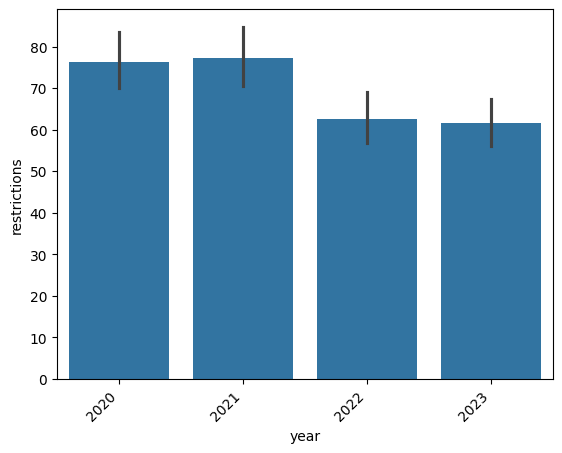

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=all_florida_data, x='year', y='restrictions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Quiz Review

## NumPy
- How do you create an array in NumPy?
- How do you access the shape of an array?
- What is the difference between shape and size of an array?
- What does it mean that data in a NumPy array must be homogeneous?  What will happen if it is not?
- What does casting mean?
- What is an attribute?  A method?
- What is an alias?  A package/module?
- Why should you be careful with strings in NumPy arrays?
- What is the identity matrix?
- What does np.linspace do?  What process in ML is it useful for?
- What does np.logspace do?
- What does .ravel do?
- What is the transpose of a matrix?
- Why might you want to set a random seed in Machine Learning?
- np.random.standard_normal generates data from a standard normal distribution.  What is the mean and standard deviation of a standard normal distribution?
- What is vectorization and why should we take advantage of that in NumPy?  How do we ensure we take advantage of that in NumPy?
- What is broadcasting?
- What is a unary function?  A binary function?
- When assigning a numpy array to a different variable, what do we have to be careful about?  How can we mitigate this?

## Pandas

- What is the difference between a method and an argument?
- What is the benefit of a vectorized approach in pandas?
- When can you select columns using the dot (.) notation?
- What do you have to be careful of when importing data into pandas regarding data types?
- What kind of data does .describe quantify?
- What is the shape of a data frame?
- How do you filter in pandas?
- What is the difference between iloc and loc?
- What is .groupby used for in pandas?
- What is the difference between a static method and a dynamic one?
- When can you use .join to merge data frames?  When do you use .merge?
- What is an inner join?  outer? left? right? cross?
- What do you have to remember when converting strings to dates in python?
